In [3]:
import sys
from pathlib import Path
sys.path.insert(1,  str(Path().resolve().parent.parent / 'src')  ) # Do this to access the python scripts
from benchmark import *
# import networkx as nx

#### Uncomment if you want to re-calculate the property array for the benchmark circuits
#calc_properties('C:/work/qubitallocation/benchmarks/circuits/')

########## qasmregfixer('C:/work/qubitallocation/benchmarks/circuits', n_p)

In [4]:
# Grab the files you want to benchmark
path = 'C:/work/qubitallocation/benchmarks/circuits/'
#path = 'C:/work/qubitallocation/benchmarks/_QUEKO/BSS/'

# Load circuit property array
circ_prop_path = 'C:/work/qubitallocation/benchmarks/data/property array/circ_prop_2020-07-17-10.13.03.npy'
#circ_prop_path = 'C:/work/qubitallocation/benchmarks/data/property array/QUEKO-BSS_prop_2020-08-06-19.18.39.npy'

prop_arr = np.load(circ_prop_path, allow_pickle=True)

# Delete 16 qubit circuits (for now)
prop_arr = np.delete(prop_arr, np.where( prop_arr['logical_qubit']==16)[0] )

# Load benchmark
bm_path  = 'C:/work/qubitallocation/benchmarks/data/benchmark array/gate-num-sp-full-d^pi-benchmark-results_2020-07-21-12.28.14.npy'
bm_arr = np.load(bm_path, allow_pickle=True)

In [16]:
# Define what data to use for full anneal compile
num = 51
bm_data = bm_arr['data_array'][num]
circ_n = bm_arr['circuit'][num]

# Run full anneal test
qiskit_full_anneal_compile(bm_data, circ_n, method='stochastic')

1000it [38:47,  2.33s/it]


In [5]:
for count, i in enumerate(prop_arr['circuit']):
    if i == 'cm42a_207.qasm':
        print(count)

51


In [8]:
prop_arr[51]

('cm42a_207.qasm', 14, 1005, 771)

In [18]:
basic = np.load('C:/work/qubitallocation/benchmarks/data/qiskit results/cm42a_207.qasm-full-anneal-compiled-with-basic_2020-08-26-14.01.00.npy', allow_pickle=True)
stochastic = np.load('C:/work/qubitallocation/benchmarks/data/qiskit results/cm42a_207.qasm-full-anneal-compiled-with-stochastic_2020-08-26-14.50.00.npy', allow_pickle=True)

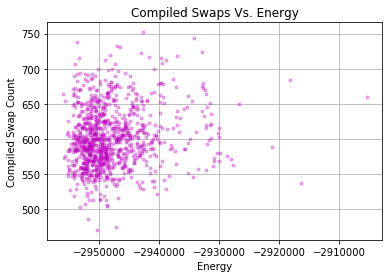

In [44]:
plt.plot(basic['energy'], basic['compiled_swap'], '.m', alpha=.3)
plt.title('Compiled Swaps Vs. Energy')
plt.ylabel('Compiled Swap Count')
plt.xlabel('Energy')
plt.grid()
plt.savefig('qiskit_full_anneal_basic_routing_SWAP.pdf')

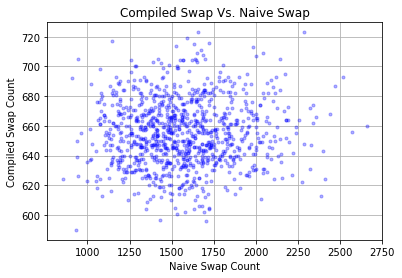

In [25]:
plt.plot(stochastic['naive_swap'], stochastic['compiled_swap'], '.b', alpha=.3)
plt.title('Compiled Swap Vs. Naive Swap')
plt.ylabel('Compiled Swap Count')
plt.xlabel('Naive Swap Count')
plt.grid()
plt.savefig('qiskit_full_anneal_stochastic_routing_NAIVESWAP_V_SWAP.pdf')

In [ ]:
# from matplotlib import cm

# # Define array to use
# num = 131
# arr = bm_arr['data_array'][num]['allocation'][0]

# plt.figure(1)
# norm = cm.colors.Normalize(vmax=1, vmin=0)
# xar = plt.pcolor(arr, cmap='cividis', edgecolors='k', linewidths=1, norm = norm)
# #plt.colorbar(xar)
# plt.ylabel('Logical qubit', fontsize=14)
# plt.xlabel('Physical qubit', fontsize=14)
# plt.gca().invert_yaxis()
# plt.savefig('allocation_example.pdf')

In [10]:
# Make a record array to give to tabular to make a latex table

# Grab prop_arr for labels
circ_prop_path = 'C:/work/qubitallocation/benchmarks/data/property array/circ_prop_with_depth_2020-08-20-15.28.53.npy'
prop_arr = np.load(circ_prop_path, allow_pickle=True)

# Data to use
tket_arr = np.load('C:/work/qubitallocation/benchmarks/data/tket results/tket-results-with-graph_2020-08-18-12.01.00.npy', allow_pickle=True)
qiskit_arr = np.load('C:/work/qubitallocation/benchmarks/data/qiskit results/qiskit_results-below-10k-unrolled-updated-swap_2020-08-20-16.43.51.npy', allow_pickle=True)

tket_arr.sort(order='circuit')
qiskit_arr.sort(order='circuit')

# Grab indices of circuits used in qiskit & tket
tket_ind = trim(prop_arr, tket_arr)
qiskit_ind = trim(prop_arr, qiskit_arr)

In [11]:
# Grab tket metrics
tket_qubo_cx = grab_tket(tket_arr['qubo'], data='cx')
tket_qubo_swap = grab_tket(tket_arr['qubo'], data='swap')
tket_qubo_depth = grab_tket(tket_arr['qubo'], data='depth')

tket_line_cx = grab_tket(tket_arr['line'], data='cx')
tket_line_swap = grab_tket(tket_arr['line'], data='swap')
tket_line_depth = grab_tket(tket_arr['line'], data='depth')

tket_graph_cx = grab_tket(tket_arr['graph'], data='cx')
tket_graph_swap = grab_tket(tket_arr['graph'], data='swap')
tket_graph_depth = grab_tket(tket_arr['graph'], data='depth')

# Grab qiskit metrics
qiskit_qubo_cx = grab_qiskit(qiskit_arr['qubo'], data='cx')
qiskit_qubo_swap = grab_qiskit(qiskit_arr['qubo'], data='swap')
qiskit_qubo_depth = grab_qiskit(qiskit_arr['qubo'], data='depth')
qiskit_qubo_prob = grab_qiskit(qiskit_arr['qubo'], data='prob')

qiskit_triv_cx = grab_qiskit(qiskit_arr['trivial'], data='cx')
qiskit_triv_swap = grab_qiskit(qiskit_arr['trivial'], data='swap')
qiskit_triv_depth = grab_qiskit(qiskit_arr['trivial'], data='depth')
qiskit_triv_prob = grab_qiskit(qiskit_arr['trivial'], data='prob')

qiskit_dense_cx = grab_qiskit(qiskit_arr['dense'], data='cx')
qiskit_dense_swap = grab_qiskit(qiskit_arr['dense'], data='swap')
qiskit_dense_depth = grab_qiskit(qiskit_arr['dense'], data='depth')
qiskit_dense_prob = grab_qiskit(qiskit_arr['dense'], data='prob')

qiskit_noise_cx = grab_qiskit(qiskit_arr['noise'], data='cx')
qiskit_noise_swap = grab_qiskit(qiskit_arr['noise'], data='swap')
qiskit_noise_depth = grab_qiskit(qiskit_arr['noise'], data='depth')
qiskit_noise_prob = grab_qiskit(qiskit_arr['noise'], data='prob')

qiskit_sabre_cx = grab_qiskit(qiskit_arr['sabre'], data='cx')
qiskit_sabre_swap = grab_qiskit(qiskit_arr['sabre'], data='swap')
qiskit_sabre_depth = grab_qiskit(qiskit_arr['sabre'], data='depth')
qiskit_sabre_prob = grab_qiskit(qiskit_arr['sabre'], data='prob')

In [12]:
def get_avg(prop_arr, arr):
    '''
    Given a property array and a percent difference array, will return the averages of each comparison as a function of logical qubit number.
    Assumed that the property array you pass this function already has the proper indices given to it (eg. if uses qiskit data, make sure it's
    passed with qiskit_ind.)
    '''
    # Initial array to grab average with
    avg_getter = np.zeros(prop_arr.size, dtype=[('logical_qubit','i8'), ('percentage', 'f8')])

    for ind in range(avg_getter.size):
        avg_getter[ind] = (prop_arr['logical_qubit'][ind], arr[ind])

    avg_getter.sort(order='logical_qubit')
    
    avg = []
    box_list = []
    for val in range(np.min(avg_getter['logical_qubit']), np.max(avg_getter['logical_qubit'])+1):
        inds = np.where(avg_getter['logical_qubit'] == val)[0]
        avg.append(np.mean(avg_getter['percentage'][inds]))
        box_list.append(avg_getter['percentage'][inds].tolist())

    return avg, box_list
        

In [13]:
dense_cx = (qiskit_qubo_cx - qiskit_dense_cx)/qiskit_qubo_cx * 100
sabre_cx = (qiskit_qubo_cx - qiskit_sabre_cx)/qiskit_qubo_cx * 100
triv_cx = (qiskit_qubo_cx - qiskit_triv_cx)/qiskit_qubo_cx * 100
noise_cx = (qiskit_qubo_cx - qiskit_noise_cx)/qiskit_qubo_cx * 100

line_cx = (tket_qubo_cx - tket_line_cx)/tket_qubo_cx * 100
graph_cx = (tket_qubo_cx - tket_graph_cx)/tket_qubo_cx * 100

print('QUBO beats trivial: ', triv_cx[triv_cx<0].size / triv_cx.size * 100)
print('QUBO beats dense: ', dense_cx[dense_cx<0].size / dense_cx.size * 100)
print('QUBO beats noise: ', noise_cx[noise_cx<0].size / noise_cx.size * 100)
print('QUBO beats sabre: ', sabre_cx[sabre_cx<0].size / sabre_cx.size * 100)
print('\n')
print('QUBO beats Line: ', line_cx[line_cx<0].size / line_cx.size * 100)
print('QUBO beats Graph: ', graph_cx[graph_cx<0].size / graph_cx.size * 100)

dense_depth = (qiskit_qubo_depth - qiskit_dense_depth)/qiskit_qubo_depth * 100
sabre_depth = (qiskit_qubo_depth - qiskit_sabre_depth)/qiskit_qubo_depth * 100
triv_depth = (qiskit_qubo_depth - qiskit_triv_depth)/qiskit_qubo_depth * 100
noise_depth = (qiskit_qubo_depth - qiskit_noise_depth)/qiskit_qubo_depth * 100

line_depth = (tket_qubo_depth - tket_line_depth)/tket_qubo_depth * 100
graph_depth = (tket_qubo_depth - tket_graph_depth)/tket_qubo_depth * 100

print('\n')
print('QUBO beats trivial: ', triv_depth[triv_depth<0].size / triv_depth.size * 100)
print('QUBO beats dense: ', dense_depth[dense_depth<0].size / dense_depth.size * 100)
print('QUBO beats noise: ', noise_depth[noise_depth<0].size / noise_depth.size * 100)
print('QUBO beats sabre: ', sabre_depth[sabre_depth<0].size / sabre_depth.size * 100)
print('\n')
print('QUBO beats Line: ', line_depth[line_depth<0].size / line_depth.size * 100)
print('QUBO beats Graph: ', graph_depth[graph_depth<0].size / graph_depth.size * 100)


QUBO beats trivial:  90.08264462809917
QUBO beats dense:  68.59504132231406
QUBO beats noise:  57.85123966942148
QUBO beats sabre:  48.760330578512395


QUBO beats Line:  56.95364238410596
QUBO beats Graph:  54.966887417218544


QUBO beats trivial:  85.12396694214877
QUBO beats dense:  70.24793388429752
QUBO beats noise:  66.94214876033058
QUBO beats sabre:  53.71900826446281


QUBO beats Line:  58.94039735099338
QUBO beats Graph:  58.94039735099338


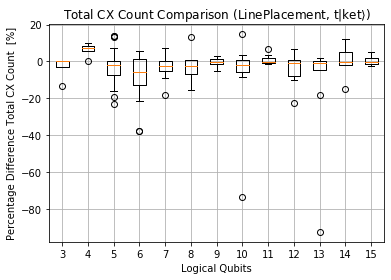

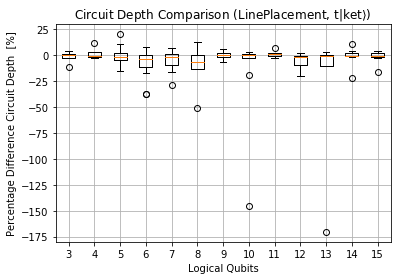

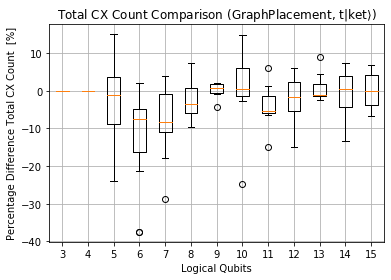

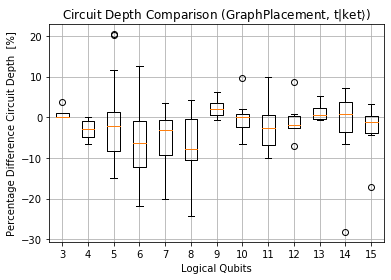

In [14]:
x_label = 'Logical Qubits'

cx_title = 'Total CX Count Comparison'
cx_ylabel = 'Percentage Difference Total CX Count  [%]'

depth_title = 'Circuit Depth Comparison'
depth_ylabel = 'Percentage Difference Circuit Depth  [%]'

avg_dom = np.arange(np.min(prop_arr['logical_qubit']), np.max(prop_arr['logical_qubit']), 1)

## TKET comparisons

plt.figure(1)
avg, box_list = get_avg(prop_arr[tket_ind], (tket_qubo_cx - tket_line_cx)/tket_qubo_cx * 100)
plt.boxplot(box_list, positions=avg_dom)
## avg = get_avg(prop_arr[tket_ind], (tket_qubo_cx - tket_line_cx)/tket_qubo_cx * 100)
## plt.plot(prop_arr['logical_qubit'][tket_ind], (tket_qubo_cx - tket_line_cx)/tket_qubo_cx * 100, '.b', alpha=.5)
## plt.plot(avg_dom, avg, '-r', alpha=.7)
plt.title(cx_title + r' (LinePlacement, t|ket$\rangle$)')
plt.ylabel(cx_ylabel)
plt.xlabel(x_label)
plt.grid()
plt.savefig('CX_RELATIVE_DIFF_QUBO-LINE_BOXPLOT.pdf')

plt.figure(2)
avg, box_list = get_avg(prop_arr[tket_ind], (tket_qubo_depth - tket_line_depth)/tket_qubo_depth * 100)
plt.boxplot(box_list, positions=avg_dom)
## avg = get_avg(prop_arr[tket_ind], (tket_qubo_depth - tket_line_depth)/tket_qubo_depth * 100)
## plt.plot(prop_arr['logical_qubit'][tket_ind], (tket_qubo_depth - tket_line_depth)/tket_qubo_depth * 100, '.b', alpha=.5)
## plt.plot(avg_dom, avg, '-r', alpha=.7)
plt.title(depth_title + r' (LinePlacement, t|ket$\rangle$)')
plt.ylabel(depth_ylabel)
plt.xlabel(x_label)
plt.grid()
plt.savefig('DEPTH_RELATIVE_DIFF_QUBO-LINE_BOXPLOT.pdf')

plt.figure(3)
avg, box_list = get_avg(prop_arr[tket_ind], (tket_qubo_cx - tket_graph_cx)/tket_qubo_cx * 100)
plt.boxplot(box_list, positions=avg_dom)
## avg = get_avg(prop_arr[tket_ind], (tket_qubo_cx - tket_graph_cx)/tket_qubo_cx * 100)
## plt.plot(prop_arr['logical_qubit'][tket_ind], (tket_qubo_cx - tket_graph_cx)/tket_qubo_cx * 100, '.b', alpha=.5)
## plt.plot(avg_dom, avg, '-r', alpha=.7)
plt.title(cx_title + r' (GraphPlacement, t|ket$\rangle$)')
plt.ylabel(cx_ylabel)
plt.xlabel(x_label)
plt.grid()
plt.savefig('CX_RELATIVE_DIFF_QUBO-GRAPH_BOXPLOT.pdf')

plt.figure(4)
avg, box_list = get_avg(prop_arr[tket_ind], (tket_qubo_depth - tket_graph_depth)/tket_qubo_depth * 100)
plt.boxplot(box_list, positions=avg_dom)
## avg = get_avg(prop_arr[tket_ind], (tket_qubo_depth - tket_graph_depth)/tket_qubo_depth * 100)
## plt.plot(prop_arr['logical_qubit'][tket_ind], (tket_qubo_depth - tket_graph_depth)/tket_qubo_depth * 100, '.b', alpha=.5)
## plt.plot(avg_dom, avg, '-r', alpha=.7)
plt.title(depth_title + r' (GraphPlacement, t|ket$\rangle$)')
plt.ylabel(depth_ylabel)
plt.xlabel(x_label)
plt.grid()
plt.savefig('DEPTH_RELATIVE_DIFF_QUBO-GRAPH_BOXPLOT.pdf')

## QISKIT comparisons

# plt.figure(1)
# avg, box_list = get_avg(prop_arr[qiskit_ind], (qiskit_qubo_cx - qiskit_dense_cx)/qiskit_qubo_cx * 100)
# plt.boxplot(box_list, positions=avg_dom)
# # plt.plot(prop_arr['logical_qubit'][qiskit_ind], (qiskit_qubo_cx - qiskit_dense_cx)/qiskit_qubo_cx * 100, '.b', alpha=.5)
# # plt.plot(avg_dom, avg, '-r', alpha=.7)
# plt.title(cx_title + ' (Dense, Qiskit)')
# plt.ylabel(cx_ylabel)
# plt.xlabel(x_label)
# plt.ylim(-50,20)
# plt.grid()
# # plt.savefig('CX_RELATIVE_DIFF_QUBO-DENSE_BOXPLOT.pdf')
# plt.savefig('CX_RELATIVE_DIFF_QUBO-DENSE_BOXPLOT_ZOOM.pdf')

# plt.figure(2)
# avg, box_list = get_avg(prop_arr[qiskit_ind], (qiskit_qubo_depth - qiskit_dense_depth)/qiskit_qubo_depth * 100)
# plt.boxplot(box_list, positions=avg_dom)
# ## avg = get_avg(prop_arr[qiskit_ind], (qiskit_qubo_depth - qiskit_dense_depth)/qiskit_qubo_depth * 100)
# ## plt.plot(prop_arr['logical_qubit'][qiskit_ind], (qiskit_qubo_depth - qiskit_dense_depth)/qiskit_qubo_depth * 100, '.b', alpha=.5)
# ## plt.plot(avg_dom, avg, '-r', alpha=.7)
# plt.title(depth_title + ' (Dense, Qiskit)')
# plt.ylabel(depth_ylabel)
# plt.xlabel(x_label)
# plt.ylim(-50,20)
# plt.grid()
# # plt.savefig('DEPTH_RELATIVE_DIFF_QUBO-DENSE_BOXPLOT.pdf')
# plt.savefig('DEPTH_RELATIVE_DIFF_QUBO-DENSE_BOXPLOT_ZOOM.pdf')

# plt.figure(3)
# avg, box_list = get_avg(prop_arr[qiskit_ind], (qiskit_qubo_cx - qiskit_sabre_cx)/qiskit_qubo_cx * 100)
# plt.boxplot(box_list, positions=avg_dom)
# ## avg = get_avg(prop_arr[qiskit_ind], (qiskit_qubo_cx - qiskit_sabre_cx)/qiskit_qubo_cx * 100)
# ## plt.plot(prop_arr['logical_qubit'][qiskit_ind], (qiskit_qubo_cx - qiskit_sabre_cx)/qiskit_qubo_cx * 100, '.b', alpha=.5)
# ## plt.plot(avg_dom, avg, '-r', alpha=.7)
# plt.title(cx_title + ' (SABRE, Qiskit)')
# plt.ylabel(cx_ylabel)
# plt.xlabel(x_label)
# plt.ylim(-50,20)
# plt.grid()
# # plt.savefig('CX_RELATIVE_DIFF_QUBO-SABRE_BOXPLOT.pdf')
# plt.savefig('CX_RELATIVE_DIFF_QUBO-SABRE_BOXPLOT_ZOOM.pdf')

# plt.figure(4)
# avg, box_list = get_avg(prop_arr[qiskit_ind], (qiskit_qubo_depth - qiskit_sabre_depth)/qiskit_qubo_depth * 100)
# plt.boxplot(box_list, positions=avg_dom)
# ## avg = get_avg(prop_arr[qiskit_ind], (qiskit_qubo_depth - qiskit_sabre_depth)/qiskit_qubo_depth * 100)
# ## plt.plot(prop_arr['logical_qubit'][qiskit_ind], (qiskit_qubo_cx - qiskit_sabre_cx)/qiskit_qubo_cx * 100, '.b', alpha=.5)
# ## plt.plot(avg_dom, avg, '-r', alpha=.7)
# plt.title(depth_title + ' (SABRE, Qiskit)')
# plt.ylabel(depth_ylabel)
# plt.xlabel(x_label)
# plt.ylim(-20,20)
# plt.grid()
# # plt.savefig('DEPTH_RELATIVE_DIFF_QUBO-SABRE_BOXPLOT.pdf')
# plt.savefig('DEPTH_RELATIVE_DIFF_QUBO-SABRE_BOXPLOT_ZOOM.pdf')

In [60]:
prop_arr.dtype

dtype([('circuit', '<U40'), ('logical_qubit', '<i8'), ('g1', '<i8'), ('g2', '<i8'), ('depth', '<i8')])

In [6]:
# tket table

tket_fields = [('Circuit', 'U30'),
          ('n', 'i8'),
          ('Initial Depth', 'i8'),
          ('Initial CX count','i8'),
          ('Line Depth','i8'),
          ('Line CX','i8'),
          ('Graph Depth','i8'),
          ('Graph CX','i8'),
          ('QUBO Depth','i8'),
          ('QUBO CX','i8')
         ]

# qiskit table

qiskit_fields = [('Circuit', 'U30'),
          ('n', 'i8'),
          ('Initial Depth', 'i8'),
          ('Initial CX count','i8'),
          ('Trivial Depth','i8'),
          ('Trivial CX','i8'),
          ('Dense Depth','i8'),
          ('Dense CX','i8'),
          ('Noise Depth','i8'),
          ('Noise CX','i8'),
          ('SABRE Depth','i8'),
          ('SABRE CX','i8'),
          ('QUBO Depth','i8'),
          ('QUBO CX','i8')
         ]

tket_table = np.zeros(tket_arr.size, dtype=tket_fields)
qiskit_table = np.zeros(qiskit_arr.size, dtype=qiskit_fields)

In [13]:
# Fill tket_table record array with data
for num in range(tket_table.size):
    tket_table[num] = (prop_arr['circuit'][tket_ind][num].rstrip('.qasm'),
                       prop_arr['logical_qubit'][tket_ind][num],
                       prop_arr['depth'][tket_ind][num],
                       prop_arr['g2'][tket_ind][num],
                       tket_line_depth[num],
                       tket_line_cx[num],
                       tket_graph_depth[num],
                       tket_graph_cx[num],
                       tket_qubo_depth[num],
                       tket_qubo_cx[num]
                      )

# Fille qiskit_table record arry with data
for num in range(qiskit_table.size):
    qiskit_table[num] = (prop_arr['circuit'][qiskit_ind][num].rstrip('.qasm'),
                       prop_arr['logical_qubit'][qiskit_ind][num],
                       prop_arr['depth'][qiskit_ind][num],
                       prop_arr['g2'][qiskit_ind][num],
                       qiskit_triv_depth[num],
                       qiskit_triv_cx[num],
                       qiskit_dense_depth[num],
                       qiskit_dense_cx[num],
                       qiskit_noise_depth[num],
                       qiskit_noise_cx[num],
                       qiskit_sabre_depth[num],
                       qiskit_sabre_cx[num],
                       qiskit_qubo_depth[num],
                       qiskit_qubo_cx[num]
                      )

In [15]:
from tabulate import tabulate

tket_table.sort(order=['Initial CX count', 'Initial Depth'])
qiskit_table.sort(order=['Initial CX count', 'Initial Depth'])

with open('tket_table_sort_cx.tex', 'w') as file:
    file.write(tabulate(tket_table, headers='keys', tablefmt='latex'))

with open('qiskit_table_sort_cx.tex', 'w') as file:
    file.write(tabulate(qiskit_table, headers='keys', tablefmt='latex'))

# Find the smallest depths and CX counts within a row and adds bold commands
# For ties, bolds all the values tieing

# tket
with open('tket_table_sort_cx.tex', 'r') as file:
    lines = file.readlines()[4:-2]

for count, row in enumerate(lines):
    init_split = row.split('&')
    val_list = row.replace(' ', '').replace('\\\\', '').rstrip('\n').split('&')[4:]

    depth = [int(val) for val in val_list[::2]]
    cx = [int(val) for val in val_list[1::2]]
    depth_ind = [count for count, val in enumerate(depth) if val == min(depth)]
    cx_ind = [count for count, val in enumerate(cx) if val == min(cx)]
        
    # Add bold to the minimum depth/cx in a row, for ties bold both
    for ind in depth_ind:
        init_split[4+ind*2] = r'\textbf{' + init_split[4+ind*2] + '}'

    for ind in cx_ind:
        if ind == len(cx) - 1:
            init_split[5+ind*2] = r'\textbf{' + init_split[5+ind*2].replace('\\', '') + r'}\\'
        else:
            init_split[5+ind*2] = r'\textbf{' + init_split[5+ind*2] + '}'
        
    # Recreate the old latex line with the bolds now in place and write line
    new_row = '&'.join(init_split)
    lines[count] = new_row
    
with open('tket_table_sort_cx.tex', 'w') as file:
    file.writelines(lines)

# qiskit
with open('qiskit_table_sort_cx.tex', 'r') as file:
    lines = file.readlines()[4:-2]

for count, row in enumerate(lines):
    init_split = row.split('&')
    val_list = row.replace(' ', '').replace('\\\\', '').rstrip('\n').split('&')[4:]

    depth = [int(val) for val in val_list[::2]]
    cx = [int(val) for val in val_list[1::2]]
    depth_ind = [count for count, val in enumerate(depth) if val == min(depth)]
    cx_ind = [count for count, val in enumerate(cx) if val == min(cx)]
        
    # Add bold to the minimum depth/cx in a row, for ties bold both
    for ind in depth_ind:
        init_split[4+ind*2] = r'\textbf{' + init_split[4+ind*2] + '}'

    for ind in cx_ind:
        if ind == len(cx) - 1:
            init_split[5+ind*2] = r'\textbf{' + init_split[5+ind*2].replace('\\', '') + r'}\\'
        else:
            init_split[5+ind*2] = r'\textbf{' + init_split[5+ind*2] + '}'
        
    # Recreate the old latex line with the bolds now in place and write line
    new_row = '&'.join(init_split)
    lines[count] = new_row
    

with open('qiskit_table_sort_cx.tex', 'w') as file:
    file.writelines(lines)

 ex1\_226                    &   6 &               5 &                  5 &           11 &        11 &             7 &         11 &            8 &         8 \\

 ex1\_226                    &   6 &               5 &                  5 &           11 &        11 &\textbf{             7 }&         11 &            8 &\textbf{         8 
}\\
 graycode6\_47               &   6 &               5 &                  5 &            5 &         5 &             5 &          5 &            5 &         5 \\

 graycode6\_47               &   6 &               5 &                  5 &\textbf{            5 }&\textbf{         5 }&\textbf{             5 }&\textbf{          5 }&\textbf{            5 }&\textbf{         5 
}\\
 xor5\_254                   &   6 &               5 &                  5 &           11 &        11 &             7 &         11 &            8 &         8 \\

 xor5\_254                   &   6 &               5 &                  5 &           11 &        11 &\textbf{             

In [ ]:
prop_arr_t = prop_arr[tket_ind]

qubo_cx = grab_cx_tket(tket_arr['qubo'])
line_cx = grab_cx_tket(tket_arr['line'])
graph_cx = grab_cx_tket(tket_arr['graph'])

In [ ]:
plt.plot(prop_arr_t['g2'], qubo_cx/prop_arr_t['g2'], '.b', label='qubo', alpha=.65)
plt.plot(prop_arr_t['g2'], line_cx/prop_arr_t['g2'], '.r', label='line', alpha=.65)
# plt.xlim(0,1000)
plt.legend()
plt.grid()
plt.title(r't|ket$\rangle$')

In [ ]:
plt.plot(prop_arr_t['g2'], (qubo_cx - graph_cx)/(qubo_cx)*100, '.g', label='qubo - graph', alpha=.65)
plt.xlim(-50,1000)
plt.legend()
plt.grid()
plt.title(r't|ket$\rangle$ initial allocation comparison')
plt.ylabel('Relative difference (Final CX) [%]')
plt.xlabel('Input CX count')
plt.savefig('test-tket-graph FINAL CX.png', dpi=900)

In [ ]:
prop_arr_q = prop_arr[qiskit_ind]

qubo_cx_q = grab_qiskit(qiskit_arr['qubo'], 'cx')
dense_cx = grab_qiskit(qiskit_arr['dense'], 'cx')
sabre_cx = grab_qiskit(qiskit_arr['sabre'], 'cx')

In [ ]:
plt.plot(prop_arr_q['g2'], (qubo_cx_q - dense_cx)/(qubo_cx_q)*100, '.b', label='qubo - dense', alpha=.5)
plt.xlim(0,1000)
plt.legend()
plt.grid()
plt.title('Qiskit initial allocation comparison')
plt.ylabel('Relative difference (Final CX) [%]')
plt.xlabel('Input CX count')
#plt.savefig('test new qiskit dense FINAL CX.png', dpi=900)

In [ ]:
bntf_tket = np.load('C:/work/qubitallocation/benchmarks/data/queko results/BNTF-tket-BRIDGE_DECOMP-QUEKO-results_2020-08-20-12.54.11.npy', allow_pickle=True)
bss_tket = np.load('C:/work/qubitallocation/benchmarks/data/queko results/BSS-tket-BRIDGE_DECOMP-QUEKO-results_2020-08-20-12.50.03.npy', allow_pickle=True)

bntf_qiskit = np.load('C:/work/qubitallocation/benchmarks/data/queko results/BNTF-unrolled-qiskit-QUEKO-results_2020-08-10-20.21.09.npy', allow_pickle=True)
bss_qiskit = np.load('C:/work/qubitallocation/benchmarks/data/queko results/BSS-unrolled-qiskit-QUEKO-results_2020-08-10-22.54.44.npy', allow_pickle=True)

In [ ]:
queko_plot(bntf_qiskit, bss_qiskit, bntf_tket, bss_tket)

In [ ]:
qiskit_arr = np.load('C:/work/qubitallocation/benchmarks/data/qiskit results/qiskit_results-below-10k-qubo-energy_2020-08-04-11.32.00.npy', allow_pickle=True)

In [ ]:
# qiskit_arr_fill = np.load('C:/work/qubitallocation/benchmarks/data/qiskit results/qiskit_results-below-10k-qubo-energy_2020-08-04-11.29.32.npy', allow_pickle=True)

# for field in qiskit_arr.dtype.names[1:]:
#     if field == 'qubo':
#         pass
#     else:
#         qiskit_arr_fill[field] = qiskit_arr[field]

In [ ]:
qiskit_judge(prop_arr, qiskit_arr, flip=False)

In [ ]:
graph = nx.Graph()
mel_edges = [[1,0], [1,2], [2,3], [4,3], [4,10], [5,4], [5,6], [5,9], [6,8], [7,8], [9,8], [9,10], [11,10], [11,3], [11,12], [12,2], [13,1], [13,12], [14,0], [14,13]] #ibm melbourne
graph.add_edges_from(mel_edges)
n_p = len(graph)
err_graph = 'C:/work/qubitallocation/IBM_qc_csv/ibmq_16_melbourne(july-12).csv'

In [ ]:
# Load benchmark array
bm_path  = 'C:/work/qubitallocation/benchmarks/data/benchmark array/gate-num-sp-full-d^pi-benchmark-results_2020-07-21-12.28.14.npy'
bm_arr = np.load(bm_path, allow_pickle=True)

# Fix the coupling map we give to qiskit
edge_fix = []
edge_fix += mel_edges

for edge in mel_edges:
    edge_fix += [ [edge[-1], edge[0] ] ] 

# Load the backend data
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.backends.ibmq_16_melbourne

# Prune how many benchmarks we're feeding the function for now,
# removing all bm's with 10k plus gates
use = []
for count, i in enumerate(prop_arr['g1'] + prop_arr['g2']):
    if i < 10000:
        use.append(count)
bm_arr = bm_arr[use]

In [ ]:
# Run the qiskit benchmarks
qiskit_benchmark(bm_arr=bm_arr,
                 n_p=n_p,
                 graph=graph,
                 hardware_edges=edge_fix,
                 backend=backend,
                 err_loc=err_graph)

In [55]:
s = []
for count, gatenum in enumerate(prop_arr['g1'] + prop_arr['g2']):
    if gatenum <= 10000:
        s.append(1)

In [4]:
bm_path1 = 'C:/work/qubitallocation/benchmarks/data/benchmark array/log-gate-benchmark-results_2020-07-17-10.38.32.npy'
bm_path2 = 'C:/work/qubitallocation/benchmarks/data/benchmark array/log-gate-sp-benchmark-results_2020-07-17-12.10.08.npy'
bm_path3 = 'C:/work/qubitallocation/benchmarks/data/benchmark array/gate-num-sp-benchmark-results_2020-07-17-12.41.00.npy'
bm_path4 = 'C:/work/qubitallocation/benchmarks/data/benchmark array/gate-num-sp-dist^2-benchmark-results_2020-07-20-13.30.49.npy'
bm_path5 = 'C:/work/qubitallocation/benchmarks/data/benchmark array/gate-num-sp-full-benchmark-results_2020-07-20-16.35.13.npy'
bm_path6 = 'C:/work/qubitallocation/benchmarks/data/benchmark array/gate-num-sp-full-d^2-benchmark-results_2020-07-21-12.01.36.npy'
bm_path7 = 'C:/work/qubitallocation/benchmarks/data/benchmark array/gate-num-sp-full-d^pi-benchmark-results_2020-07-21-12.28.14.npy'
bm_path8 = 'C:/work/qubitallocation/benchmarks/data/benchmark array/gate-num-no-error-d^pi-benchmark-results_2020-08-07-12.46.21.npy'
bm_path9 = 'C:/work/qubitallocation/benchmarks/data/benchmark array/gate-num-mult-connect-d^pi-benchmark-results_2020-08-07-14.50.08.npy'
bm_path10 = 'C:/work/qubitallocation/benchmarks/data/benchmark array/100-anneal-test-no-err-benchmark-results_2020-08-08-15.50.41.npy'

log_gate = np.load(bm_path1, allow_pickle=True)
log_gate_sp = np.load(bm_path2, allow_pickle=True)
gate_sp = np.load(bm_path3, allow_pickle=True)
gate_sp_d2 = np.load(bm_path4, allow_pickle=True)
gate_sp_full = np.load(bm_path5, allow_pickle=True)
gate_sp_full_d2 = np.load(bm_path6, allow_pickle=True)
gate_sp_full_dpi = np.load(bm_path7, allow_pickle=True)
gate_no_err_dpi = np.load(bm_path8, allow_pickle=True)
gate_mult_connect_dpi = np.load(bm_path9, allow_pickle=True)
gate_no_err_dpi_100_neal = np.load(bm_path10, allow_pickle=True)

151it [00:18,  8.23it/s]


# of circuits used for swap plot:  148
# of circuits used for prob plot:  124


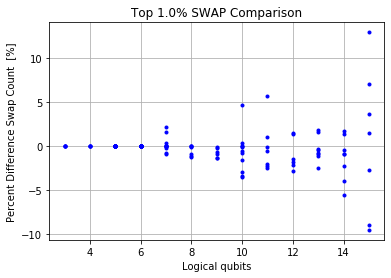

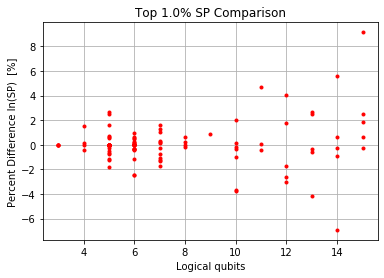

In [5]:
# Get comparison plots for swap/success_prob metrics for two benchmark runs
arr1 = gate_sp_d2
arr2 = gate_sp

# Sort arrays so their data is all lined up
prop_arr.sort(order='circuit')
arr1.sort(order='circuit')
arr2.sort(order='circuit')

coef_judge(prop_arr, arr1['data_array'], arr2['data_array'], .01, label1='gate_sp_d2', label2='gate_sp', flip=False)

In [ ]:
# Define what circuits to use
circ_list = prop_arr['circuit'][270:]

# Benchmark QUEKO circuits
QUEKO_benchmark(circuit_list = circ_list,
                loc = path)

# # Load QUEKO-QUBO benchmarks
# queko_bm = np.load('C:/work/qubitallocation/benchmarks/data/benchmark array/BSS-QUEKO-benchmark-results_2020-08-10-06.50.47.npy', allow_pickle=True)

# # Benchmark QUEKO-QUBO with qiskit
# queko_qiskit_bm(queko_bm)

In [ ]:
# Delete 16 qubit circuits (for now)
#prop_arr = np.delete(prop_arr, np.where( prop_arr['logical_qubit']==16)[0] )

circ_ls = prop_arr['circuit']

# Benchmark the circuits
benchmark(circuit_list = circ_ls,
          loc = path,
          n_p = n_p,
          graph = graph,
          err_graph = err_graph,
          num_samples=100)

In [ ]:
# Graph anneal timings
plot_times(bm_arr, prop_arr, save=True)

In [3]:
bm_path  = 'C:/work/qubitallocation/benchmarks/data/benchmark array/gate-num-sp-full-d^pi-benchmark-results_2020-07-21-12.28.14.npy'
bm_arr = np.load(bm_path, allow_pickle=True)

In [3]:
# Generate swap and energy histograms for all anneals in benchmark
plot_results(bm_arr,
             directory = bm_path.split('/')[-1].rstrip('.npy')
            )

151it [01:58,  1.28it/s]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [3]:
# Define hardware graph
graph = nx.Graph()
mel_edges = [[1,0], [1,2], [2,3], [4,3], [4,10], [5,4], [5,6], [5,9], [6,8], [7,8], [9,8], [9,10], [11,10], [11,3], [11,12], [12,2], [13,1], [13,12], [14,0], [14,13]] #ibm melbourne
graph.add_edges_from(mel_edges)
paths = nx.shortest_path(graph)

# # Hardware properties
n_p = len(graph)
err_graph = 'C:/work/qubitallocation/IBM_qc_csv/ibmq_16_melbourne(july-12).csv'

# Get error rates
err1, err2 = read_err(err_graph, n_p)
# Generate and save heatmaps of allocations

# Set what data array to use for heatmap
num = -2
heatdata = bm_arr['data_array'][num]

# Specify circuit name
circ_n = bm_arr['circuit'][num].strip('.qasm')

# Generate allocation heatmap
# heatname = 'C:/work/qubitallocation/heuristic_tests/' + str_penalty + fname +'_heatmap' +'.png' 
# heatmap(n_p, heatdata, graph, heatname, err1, err2)

#If doing slices, uncomment out below and comment out above

def slices(heatdata, size, slice_type):
    heatdata[['energy','swaps','success_prob']].sort(order=['energy'])
    step = len(heatdata) * size   #bin size
    half = len(heatdata)/2

    if slice_type == 'HIGH':
        heatdata = heatdata[-int(step):] 
    if slice_type == 'MID':
        heatdata = heatdata[int(half):int(half+step)]
    if slice_type == 'LOW':
        heatdata = heatdata[:int(step)] 

    return heatdata

for i in ['HIGH', 'MID', 'LOW']:
    heatname = 'C:/work/qubitallocation/benchmarks/data/plots/Heatmaps/' + circ_n +'_heatmap_' + i + '-Energy' +'.pdf'
    slicedata = slices(heatdata, .05, i)
    print(len(slicedata))
    heatmap(n_p, slicedata, graph, heatname, err1, err2, slice_type=i)

42
[14. 18. 24. 17. 12. 17. 11.  6. 17. 17. 21. 19. 26. 26. 13.] 43
42
[ 0. 26. 26. 28. 47. 21.  0.  0.  0. 21. 47. 47. 19.  0.  0.] 47
42
[ 0.  0.  0. 55. 55.  0.  0.  0.  0. 55. 55. 55. 55.  0.  0.] 55


<Figure size 432x288 with 0 Axes>